### Estimating an ARMA(p,q) model from data
We are now given a time series $x_1, x_2, \dots$ and we want to estimate for a given order $(p,q)$ the coefficients $a_1, \dots, a_p$ and $b_1, \dots, b_q$. We showed the maximum likelihood method as one approach (although there are different ways to estimate the coefficients)


In [1]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("data/TeslaIdx1.csv", sep = "\t")
df.head()

Matplotlib is building the font cache; this may take a moment.


,Date,Close,Volume
0,2012-10-19,27.74,1027302
1,2012-10-22,27.85,470198
2,2012-10-23,28.39,748998
3,2012-10-24,27.42,1016368
4,2012-10-25,27.52,577686


We turn the data frame into a times series object

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', drop = True, inplace=True)
df.head()

,Close,Volume
Date,,
2012-10-19,27.74,1027302
2012-10-22,27.85,470198
2012-10-23,28.39,748998
2012-10-24,27.42,1016368
2012-10-25,27.52,577686


We compute the *log-returns* of the stock index for the closing value of the index, i.e.
$$
r^\text{log}_n = \log\left(\frac{X_{n}}{X_{n-1}}\right)
$$

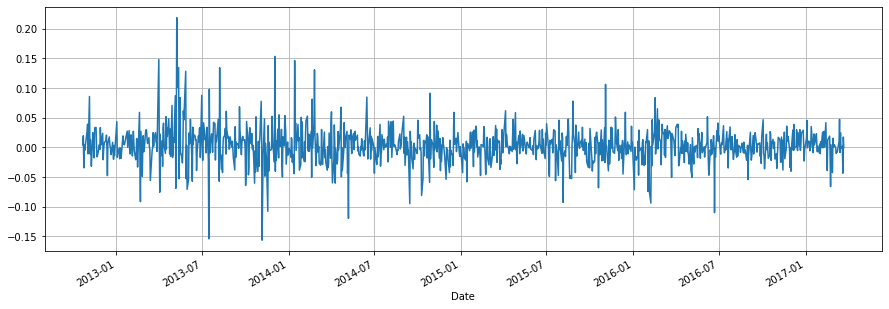

In [3]:
lr = np.log(df.Close.values[1:]/df.Close.values[:-1])
lr = np.r_[np.NaN, lr]
df['LogRet'] = lr
df['LogRet'].plot(figsize = (15,5))
plt.grid()

We use the `ARIMA` class to estimate the parameters. To this end, we initialize the class with the observed series and the order of the model. By calling `.fit()` the model parameters are estimated. The summary function gives a comprehensive report on the model.

In [4]:
df.dropna(axis = 0, inplace = True)
model = ARIMA(df.LogRet, order = (1,0,1))
res = model.fit()
print(res.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                 LogRet   No. Observations:                 1111
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2308.225
Date:                Wed, 13 Dec 2023   AIC                          -4608.449
Time:                        13:20:25   BIC                          -4588.397
Sample:                             0   HQIC                         -4600.867
                               - 1111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      2.111      0.035       0.000       0.004
ar.L1         -0.2060      0.864     -0.238      0.812      -1.899       1.487
ma.L1          0.2277      0.864      0.263      0.7

The summary shows that the estimated coefficients are not significantly different from $0$ which means, that the time series can not be modelled by means of an AR(1,1) model. This is also the reason why you whitness different coefficients compared to the slides: Since there is no *real* model describing the log-returns of the Tesla stock index the estimated coefficients are just due to some numerical algorithm. Depending on the algorithm implementation you will receive other results. 

The plot below showing the predicted values further stresses the fact that modelling of the log-returns is futile.

<AxesSubplot:xlabel='Date'>

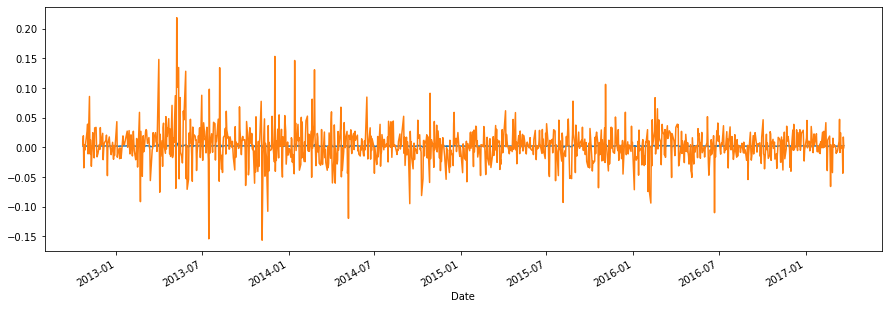

In [5]:
plt.figure(figsize = (15,5))
plt.plot(res.predict())
df.LogRet.plot()